In [2]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from matplotlib.pyplot import gray
from sklearn.metrics import confusion_matrix


import numpy as np
import seaborn as sns
np.random.seed(5)

In [3]:
#load mnist dataset from keras and split our data 
#X will be images , y is numbers 

(X_train,y_train), (X_test,y_test) =  keras.datasets.mnist.load_data()

In [4]:
print('Training samples:' , len(X_train))
print('Testing samples: ' , len(X_test))

print('shape of indivual images: ' , X_train[0].shape)

Training samples: 60000
Testing samples:  10000
shape of indivual images:  (28, 28)


## visualize examples

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

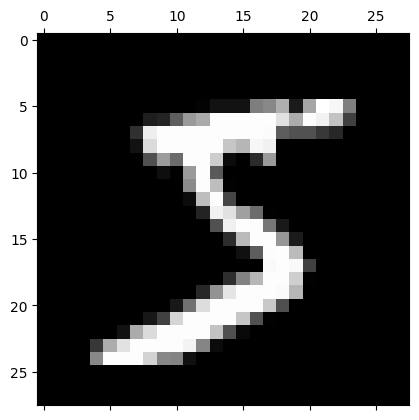

In [6]:
from matplotlib.pyplot import gray


plt.matshow(X_train[0], cmap = 'gray')

In [7]:
y_train[0]

np.uint8(5)

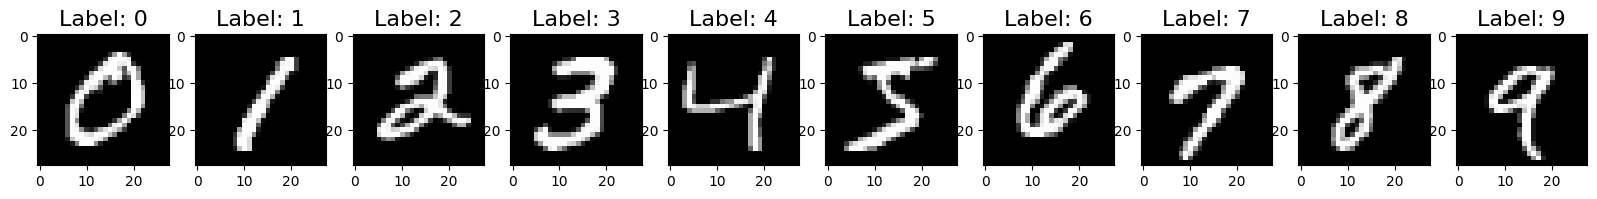

In [8]:
num_classes = 10
_, ax = plt.subplots(1,num_classes,figsize=(20,20))
for i in range(0,num_classes):
    sample = X_train[y_train == i][0]
    ax[i].imshow(sample,cmap='gray')
    ax[i].set_title(f'Label: {i}',fontsize=16)



In [9]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [10]:
#we need to make them classes not numbers , coz theese are continuous we cant feed these to model coz if there is 
#something between 4 and 5 it will predict 4.5 and we dont need that so convert to classes so it will give strictly one class

#vector encoding 
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [11]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## preparing data rescaling and resizing

In [12]:
#rescaling

X_train,X_test=X_train/255,X_test/255


In [13]:
for r in X_train[2]:
    for c in r:
        if c>0:
            print(c)

0.2627450980392157
0.9098039215686274
0.15294117647058825
0.24313725490196078
0.3176470588235294
0.47058823529411764
0.7058823529411765
0.15294117647058825
0.49411764705882355
0.6392156862745098
0.00784313725490196
0.6
0.8235294117647058
0.1568627450980392
0.8627450980392157
0.6392156862745098
0.10588235294117647
0.996078431372549
0.6352941176470588
0.8705882352941177
0.6392156862745098
0.7176470588235294
0.996078431372549
0.49019607843137253
0.1803921568627451
0.9607843137254902
0.6392156862745098
0.7764705882352941
0.996078431372549
0.2196078431372549
0.47058823529411764
0.996078431372549
0.6392156862745098
0.09019607843137255
0.9058823529411765
0.996078431372549
0.11372549019607843
0.6235294117647059
0.996078431372549
0.47058823529411764
0.6392156862745098
0.996078431372549
0.8470588235294118
0.06274509803921569
0.6235294117647059
0.996078431372549
0.2627450980392157
0.054901960784313725
0.33725490196078434
0.6980392156862745
0.9725490196078431
0.996078431372549
0.3568627450980392
0

In [14]:
#converting image size into vector 

X_train= X_train.reshape(len(X_train), 28*28) #or (X_train.shape[0],-1) -1 will multiply

X_test = X_test.reshape(len(X_test), 28*28)


In [15]:
print(X_train.shape)

(60000, 784)


model = keras.Sequential(
    [
        keras.layers.Dense(128,input_shape=(784,), activation='softmax'),
        keras.layers.Dense(64, activation='softmax'),
        keras.layers.Dense(32, activation='softmax'),
        keras.layers.Dense(16,activation='softmax'),
    ]
)

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x=X_train,y=y_train, epochs = 10 ) # epochs is how many times we train the model

In [17]:
#creating an initial neural network using keras

#we will initially use simple neural ntwork with an input layer and output layer 

#input have 784 neurons(the shape)
# output have 10 neurons  as we want to predict 0-9 initially 


model = Sequential()

model.add(Dense(units=128 ,input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10 , activation='softmax')) #output 10 neurons 

model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model.summary()






Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
batch_size=512
epoch=10
model.fit(x=X_train, y=y_train,batch_size=batch_size,epochs=epoch)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8223 - loss: 0.6052
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9329 - loss: 0.2308
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9509 - loss: 0.1685
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9598 - loss: 0.1350
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9683 - loss: 0.1100
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9719 - loss: 0.0936
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9765 - loss: 0.0797
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9791 - loss: 0.0683
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9818 - loss: 0.0604
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9835 - loss: 0.0543


## evaluate

In [19]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print('testloss: {},Testaccuracy :{}'.format(test_loss,test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9768 - loss: 0.0747
testloss: 0.07469699531793594,Testaccuracy :0.9768000245094299


## predictions


In [20]:
y_pred= model.predict(X_test)
y_pred_classes = np.argmax(y_pred , axis=1) #goes to every row and pics high probablity of that index 
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
[[2.30618795e-07 9.78716707e-06 4.20538563e-05 ... 9.99482751e-01
  1.13736246e-06 7.90047943e-06]
 [4.19448156e-08 1.22277153e-04 9.99712765e-01 ... 1.26886572e-08
  2.53632766e-06 8.27793042e-11]
 [1.38425810e-06 9.97300565e-01 1.43825207e-04 ... 1.91976185e-04
  1.89671491e-03 1.45184913e-05]
 ...
 [2.19941523e-10 3.49476537e-08 4.31183318e-11 ... 4.66451610e-07
  4.84958218e-06 2.34827166e-04]
 [5.45928103e-08 2.26564989e-08 1.42695397e-10 ... 2.45705280e-07
  9.90444387e-05 1.42843692e-08]
 [1.06072314e-07 1.44331347e-08 1.45041469e-07 ... 1.02081385e-10
  3.40133588e-09 6.55436760e-10]]
[7 2 1 ... 4 5 6]


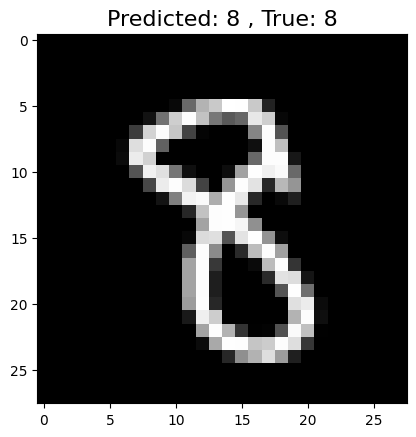

In [25]:
random_index = np.random.choice(len(X_test))
X_sample = X_test[random_index]
y_true = np.argmax(y_test,axis=1)
y_sample_true = y_true[random_index]
y_sample_pred_class = y_pred_classes[random_index]

plt.title(f"Predicted: {y_sample_pred_class} , True: {y_sample_true}", fontsize=16)

plt.imshow(X_sample.reshape(28,28) , cmap = 'grey')

## confusion matrix

Text(0.5, 1.0, 'confusion matrix')

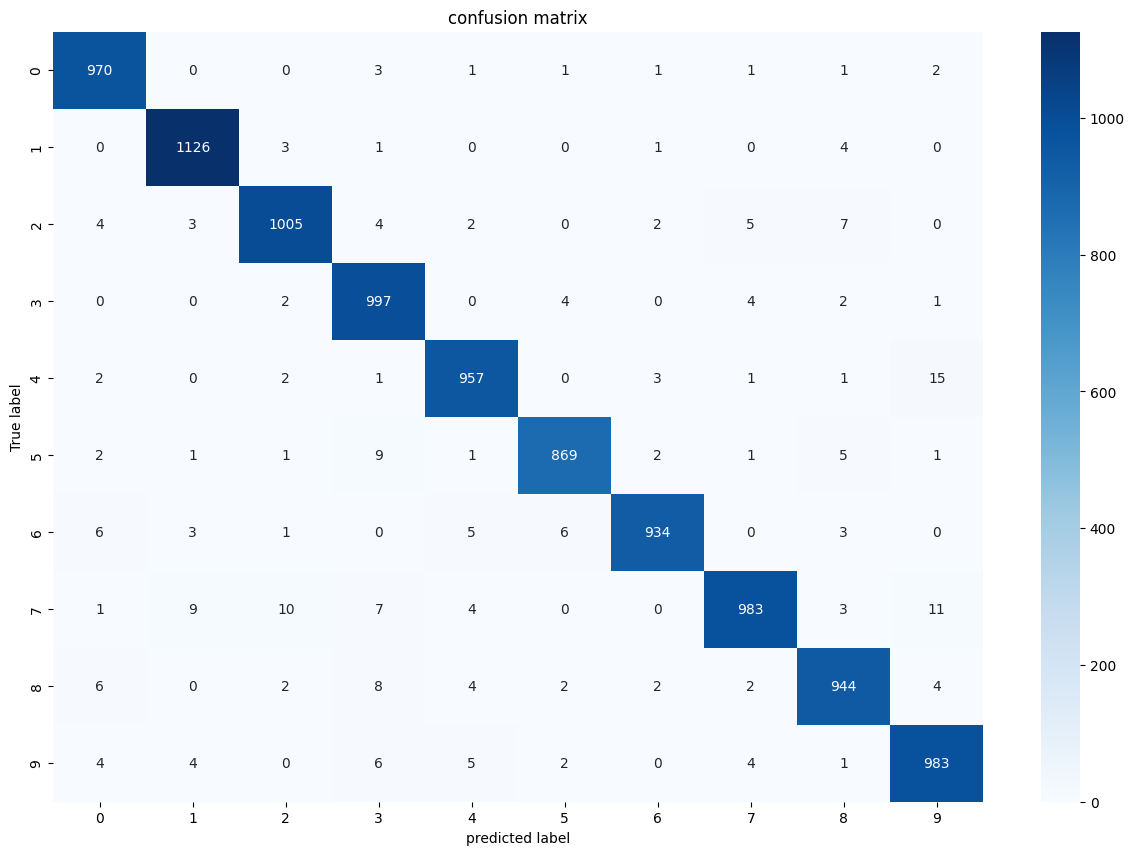

In [26]:
confusion_mtrx = confusion_matrix(y_true, y_pred_classes)

#plot

fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(confusion_mtrx,annot=True,fmt='d',ax=ax,cmap='Blues')
ax.set_xlabel('predicted label')
ax.set_ylabel('True label')
ax.set_title('confusion matrix')